Unit step response

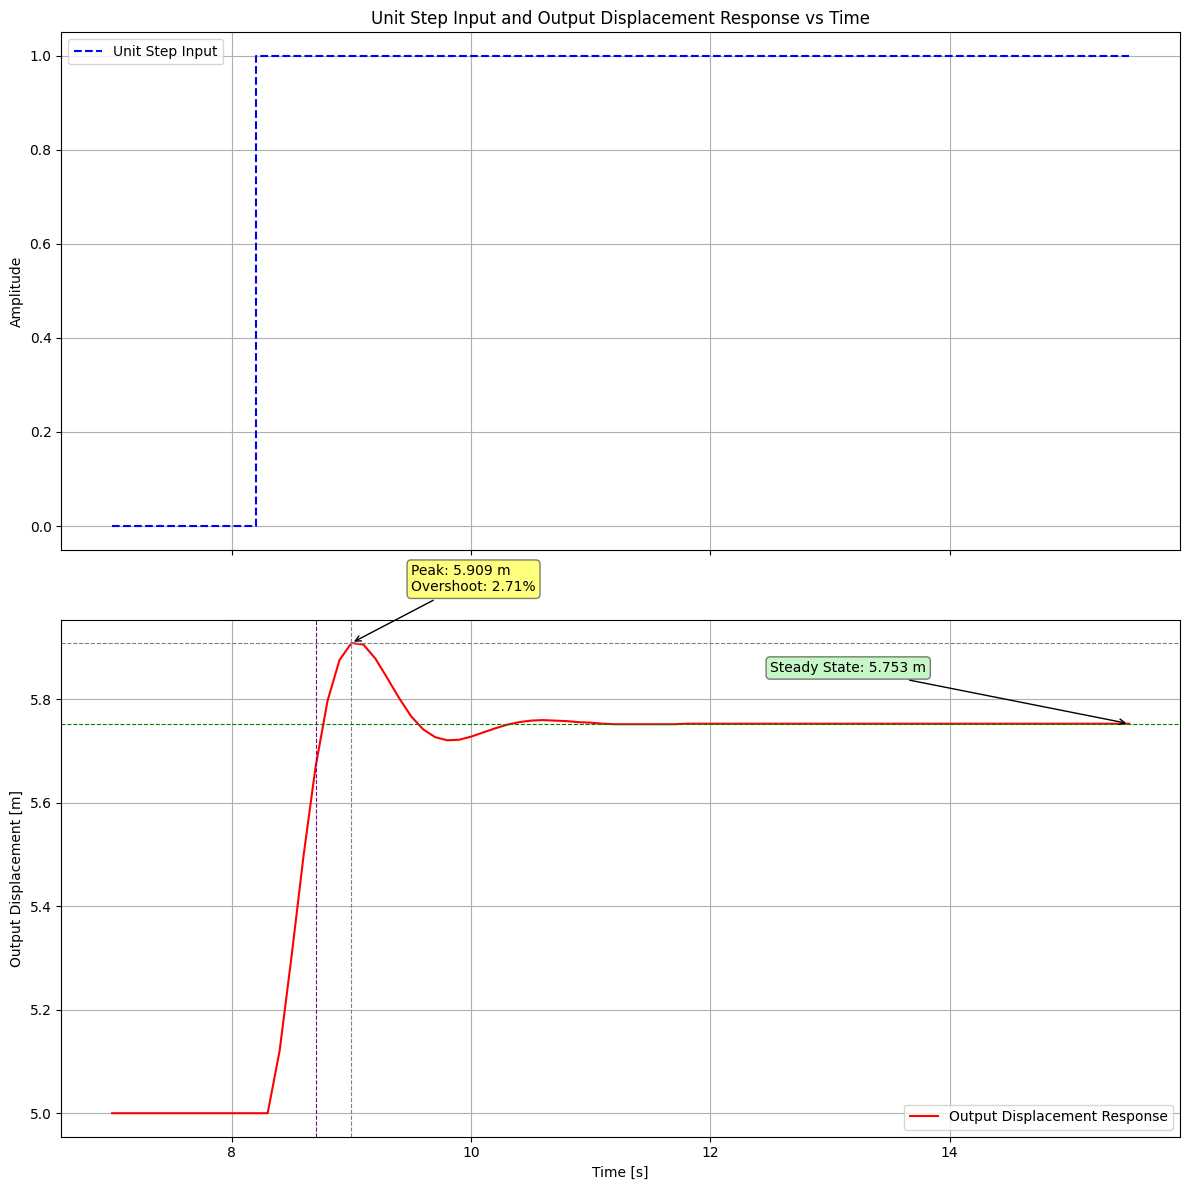

In [ ]:
import matplotlib.pyplot as plt

# Given data
data = [
    [7, 0, 5], [7.1, 0, 5], [7.2, 0, 5], [7.3, 0, 5], [7.4, 0, 5],
    [7.5, 0, 5], [7.6, 0, 5], [7.7, 0, 5], [7.8, 0, 5], [7.9, 0, 5],
    [8, 0, 5], [8.1, 0, 5], [8.2, 1, 5], [8.3, 1, 5], [8.4, 1, 5.121],
    [8.5, 1, 5.304], [8.6, 1, 5.498], [8.7, 1, 5.669], [8.8, 1, 5.797],
    [8.9, 1, 5.876], [9, 1, 5.909], [9.1, 1, 5.906], [9.2, 1, 5.879],
    [9.3, 1, 5.841], [9.4, 1, 5.802], [9.5, 1, 5.767], [9.6, 1, 5.742],
    [9.7, 1, 5.727], [9.8, 1, 5.721], [9.9, 1, 5.722], [10, 1, 5.728],
    [10.1, 1, 5.736], [10.2, 1, 5.744], [10.3, 1, 5.751], [10.4, 1, 5.756],
    [10.5, 1, 5.759], [10.6, 1, 5.76], [10.7, 1, 5.759], [10.8, 1, 5.758],
    [10.9, 1, 5.756], [11, 1, 5.755], [11.1, 1, 5.753], [11.2, 1, 5.752],
    [11.3, 1, 5.752], [11.4, 1, 5.752], [11.5, 1, 5.752], [11.6, 1, 5.752],
    [11.7, 1, 5.752], [11.8, 1, 5.753], [11.9, 1, 5.753], [12, 1, 5.753],
    [12.1, 1, 5.753], [12.2, 1, 5.753], [12.3, 1, 5.753], [12.4, 1, 5.753],
    [12.5, 1, 5.753], [12.6, 1, 5.753], [12.7, 1, 5.753], [12.8, 1, 5.753],
    [12.9, 1, 5.753], [13, 1, 5.753], [13.1, 1, 5.753], [13.2, 1, 5.753],
    [13.3, 1, 5.753], [13.4, 1, 5.753], [13.5, 1, 5.753], [13.6, 1, 5.753],
    [13.7, 1, 5.753], [13.8, 1, 5.753], [13.9, 1, 5.753], [14, 1, 5.753],
    [14.1, 1, 5.753], [14.2, 1, 5.753], [14.3, 1, 5.753], [14.4, 1, 5.753],
    [14.5, 1, 5.753], [14.6, 1, 5.753], [14.7, 1, 5.753], [14.8, 1, 5.753],
    [14.9, 1, 5.753], [15, 1, 5.753], [15.1, 1, 5.753], [15.2, 1, 5.753],
    [15.3, 1, 5.753], [15.4, 1, 5.753], [15.5, 1, 5.753]
]

# Separate data into arrays
time = [row[0] for row in data]
step_input = [row[1] for row in data]
output = [row[2] for row in data]

# Calculate steady state value and peak value
steady_state_value = output[-1]
peak_value = max(output)

# Calculate overshoot percentage
overshoot_percentage = ((peak_value - steady_state_value) / steady_state_value) * 100

# Find the time of the peak value
peak_time = time[output.index(peak_value)]

# Find settling time (time when output is within 2% of steady-state value)
settling_threshold = 0.02 * steady_state_value
settling_time = next((t for t, y in zip(time, output) if abs(y - steady_state_value) <= settling_threshold), None)

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Plot Step Input
ax[0].step(time, step_input, where='post', label='Unit Step Input', color='blue', linestyle='--')
ax[0].set_ylabel('Amplitude')
ax[0].legend()
ax[0].grid(True)
ax[0].set_title('Unit Step Input and Output Displacement Response vs Time')

# Plot Output
ax[1].plot(time, output, label='Output Displacement Response', color='red')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Output Displacement [m]')
ax[1].legend()
ax[1].grid(True)

# Draw lines and annotate the peak value
ax[1].axhline(peak_value, color='gray', linestyle='--', linewidth=0.8)
ax[1].axvline(peak_time, color='gray', linestyle='--', linewidth=0.8)
ax[1].annotate(f'Peak: {peak_value:.3f} m\nOvershoot: {overshoot_percentage:.2f}%',
               xy=(peak_time, peak_value),
               xytext=(peak_time + 0.5, peak_value + 0.1),
               arrowprops=dict(facecolor='black', arrowstyle='->'),
               fontsize=10,
               bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.5))

# Draw line and annotate the steady state value
ax[1].axhline(steady_state_value, color='green', linestyle='--', linewidth=0.8)
ax[1].annotate(f'Steady State: {steady_state_value:.3f} m',
               xy=(time[-1], steady_state_value),
               xytext=(time[-1] - 3, steady_state_value + 0.1),
               arrowprops=dict(facecolor='black', arrowstyle='->'),
               fontsize=10,
               bbox=dict(boxstyle='round,pad=0.3', fc='lightgreen', alpha=0.5))

# Draw line and annotate the settling time
if settling_time:
    ax[1].axvline(settling_time, color='purple', linestyle='--', linewidth=0.8)
    

# Show the plots
plt.tight_layout()
plt.show()


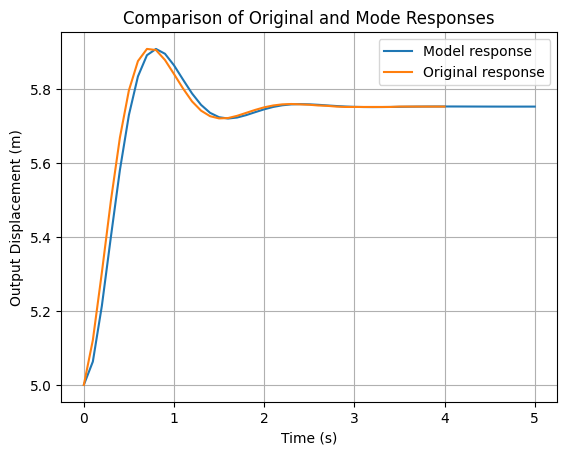

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control

# System parameters
K = 0.753
omega_n = 4.393
zeta = 0.4481

# Transfer function
num = [K * omega_n**2]
den = [1, 2 * zeta * omega_n, omega_n**2]
sys = control.tf(num, den)

# Time vector
t = np.arange(0, 5.1, 0.1)

# Step response
t, y1 = control.step_response(sys, T=t)

y1 = y1 +5

# Previous data
time = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4]
output = [5,5.121, 5.304, 5.498, 5.669, 5.797, 5.876, 5.909, 5.906, 5.879, 5.841, 5.802, 5.767, 5.742, 5.727, 5.721, 5.722, 5.728, 5.736, 5.744, 5.751, 5.756, 5.759, 5.76, 5.759, 5.758, 5.756, 5.755, 5.753, 5.752, 5.752, 5.752, 5.752, 5.752, 5.752, 5.753, 5.753, 5.753, 5.753, 5.753, 5.753]

# Plot both responses
plt.plot(t, y1, label='Model response')
plt.plot(time, output, label='Original response')

# Add labels and legend
plt.xlabel('Time (s)')
plt.ylabel('Output Displacement (m)')
plt.title('Comparison of Original and Mode Responses')
plt.legend()
plt.grid(True)

plt.show()


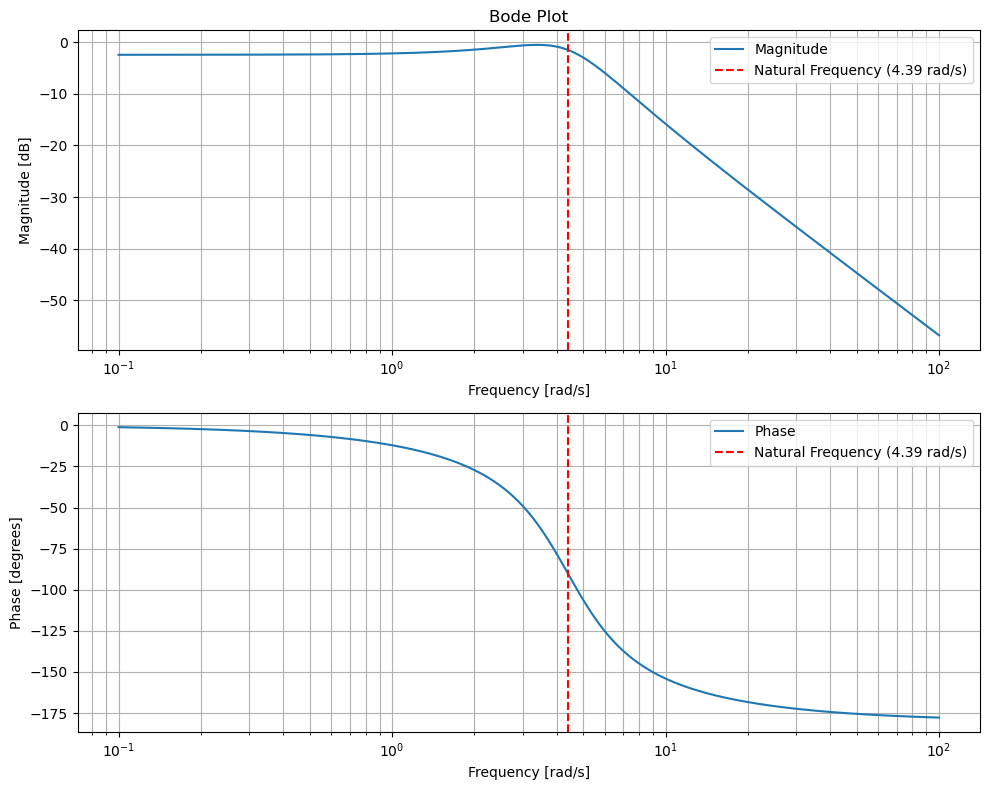

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parameters
omega_n = 4.393
zeta = 0.4481
K = 0.753

# Transfer function components
numerator1 = [K * omega_n**2]
denominator1 = [1, 2 * zeta * omega_n, omega_n**2]

# Create transfer function
sys1 = signal.TransferFunction(numerator1, denominator1)

# Frequency range for Bode plot
omega = np.logspace(-1, 2, 500)

# Compute the Bode plot for sys1
w1, mag1, phase1 = signal.bode(sys1, omega)

# Plot the Bode plot
plt.figure(figsize=(10, 8))

# Bode magnitude plot
plt.subplot(2, 1, 1)
plt.semilogx(w1, mag1, label='Magnitude')
plt.axvline(x=omega_n, color='r', linestyle='--', label=f'Natural Frequency ({omega_n:.2f} rad/s)')
plt.title('Bode Plot')
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Magnitude [dB]')
plt.grid(which='both', axis='both')
plt.legend()

# Bode phase plot
plt.subplot(2, 1, 2)
plt.semilogx(w1, phase1, label='Phase')
plt.axvline(x=omega_n, color='r', linestyle='--', label=f'Natural Frequency ({omega_n:.2f} rad/s)')
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Phase [degrees]')
plt.grid(which='both', axis='both')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


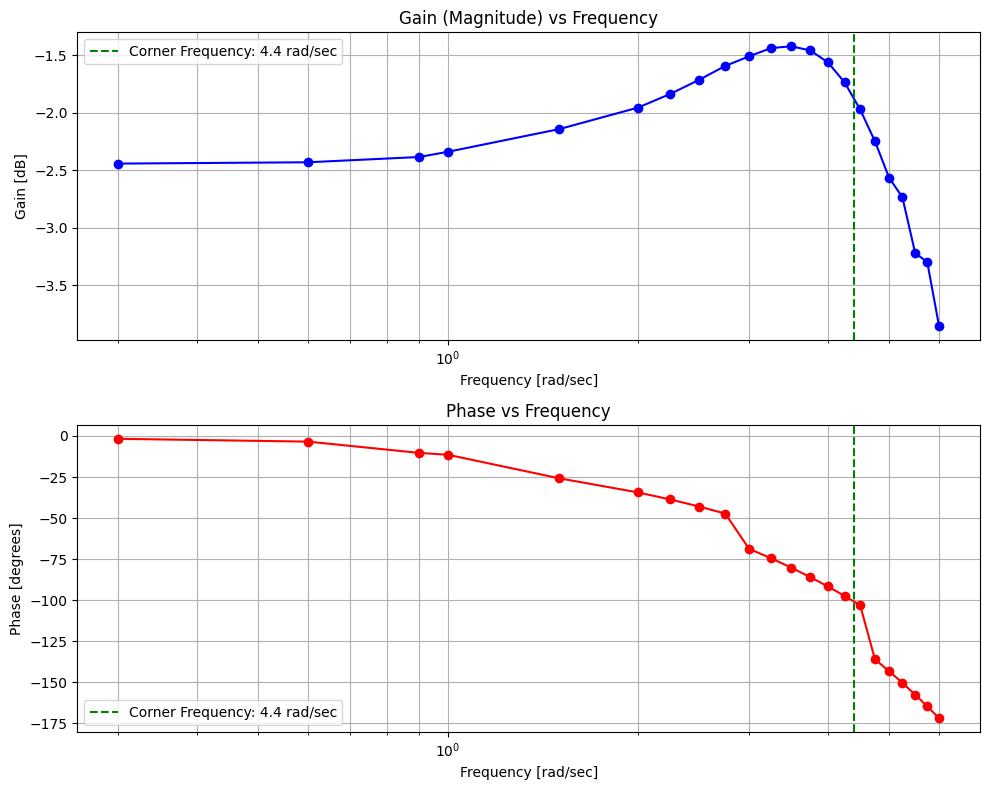

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Provided data
frequency = np.array([0.3, 0.6, 0.9, 1, 1.5, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5, 5.25, 5.5, 5.75, 6, 6.5, 7])
gain_dB = np.array([-2.441060967, -2.42956409, -2.383728154, -2.338132828, -2.141420353, -1.954501591, -1.835662938, -1.713136858, -1.592315156, -1.509245644, -1.437205862, -1.421846195, -1.457727761, -1.561070915, -1.734321965, -1.970833572, -2.247653993, -2.562705958, -2.733542798, -3.216726342, -3.298877966, -3.849299439, -4.415287366, -4.90539062])
phase_degrees = np.array([-1.718650541, -3.437301082, -10.31190325, -11.45767027, -25.77975812, -34.37301082, -38.66963717, -42.96626353, -47.26288988, -68.74602164, -74.47485678, -80.20369192, -85.93252705, -91.66136219, -97.39019733, -103.1190325, -136.0598345, -143.2208784, -150.3819223, -157.5429663, -164.7040102, -171.8650541, -186.1871419, -200.5092298])

# Exclude phase data after -180 degrees
valid_indices = np.where(phase_degrees > -180)
frequency = frequency[valid_indices]
gain_dB = gain_dB[valid_indices]
phase_degrees = phase_degrees[valid_indices]

# Plot the Gain (Magnitude) vs Frequency
plt.figure(figsize=(10, 8))

# Magnitude plot
plt.subplot(2, 1, 1)
plt.semilogx(frequency, gain_dB, marker='o', linestyle='-', color='b')
plt.title('Gain (Magnitude) vs Frequency')
plt.xlabel('Frequency [rad/sec]')
plt.ylabel('Gain [dB]')
plt.grid(which='both', axis='both')

# Manually set the corner frequency
corner_frequency = 4.4  # Between 4.25 and 4.5 rad/sec
plt.axvline(x=corner_frequency, color='g', linestyle='--', label=f'Corner Frequency: {corner_frequency} rad/sec')
plt.legend()

# Phase plot
plt.subplot(2, 1, 2)
plt.semilogx(frequency, phase_degrees, marker='o', linestyle='-', color='r')
plt.title('Phase vs Frequency')
plt.xlabel('Frequency [rad/sec]')
plt.ylabel('Phase [degrees]')
plt.grid(which='both', axis='both')

# Highlight the corner frequency on the phase plot as well
plt.axvline(x=corner_frequency, color='g', linestyle='--', label=f'Corner Frequency: {corner_frequency} rad/sec')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


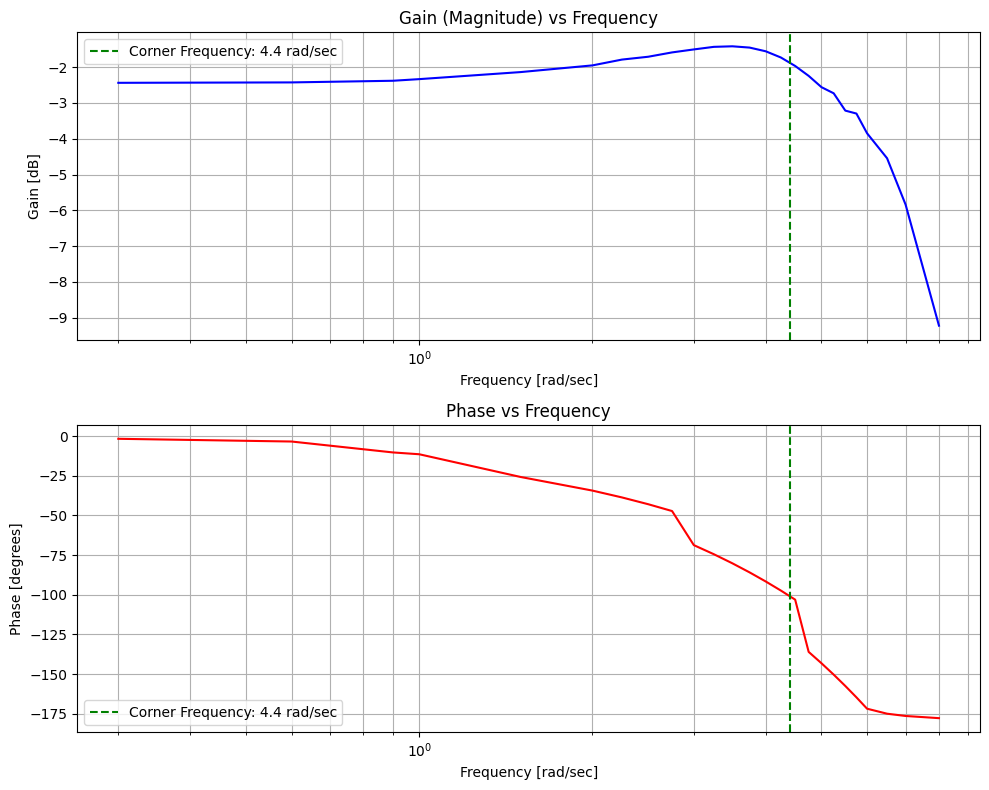

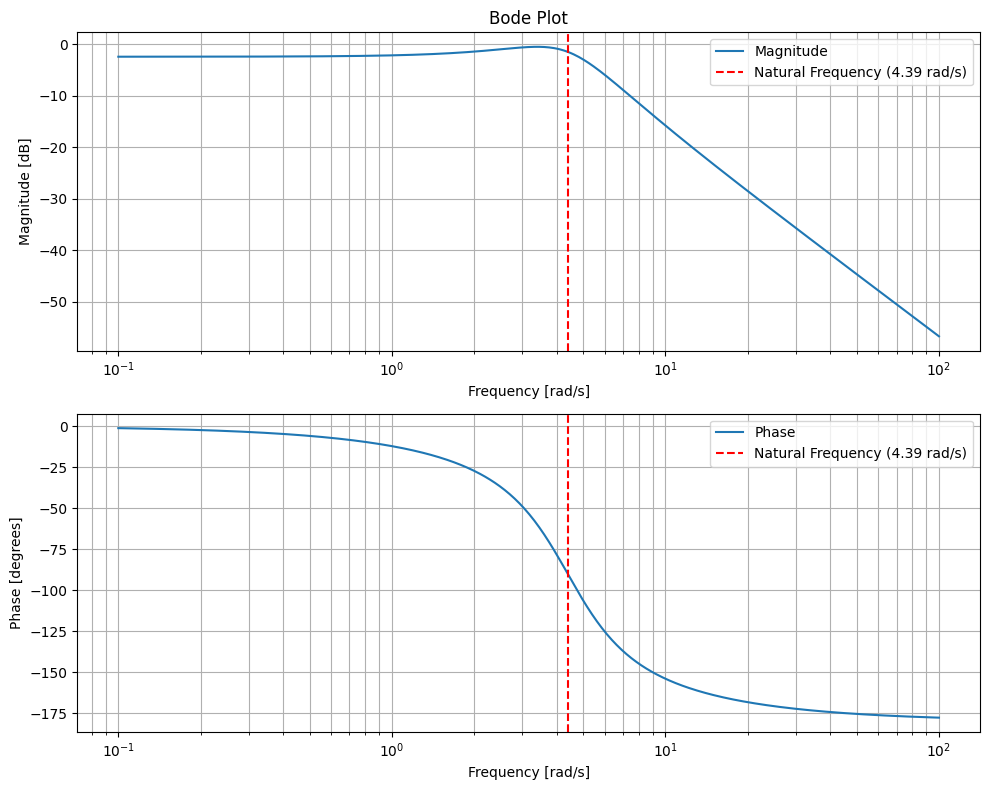

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Provided data
# Provided data
frequency = np.array([0.3, 0.6, 0.9, 1, 1.5, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5, 5.25, 5.5, 5.75, 6, 6.5, 7, 8, ])
gain_dB = np.array([-2.441060967, -2.42956409, -2.383728154, -2.338132828, -2.141420353, -1.954501591, -1.792657427, -1.713136858, -1.592315156, -1.509245644, -1.437205862, -1.421846195, -1.457727761, -1.561070915, -1.734321965, -1.970833572, -2.247653993, -2.562705958, -2.733542798, -3.216726342, -3.298877966, -3.849299439, -4.546232906, -5.840085072, -9.218478024])
phase_degrees = np.array([-1.718650541, -3.437301082, -10.31190325, -11.45767027, -25.77975812, -34.37301082, -38.66963717, -42.96626353, -47.26288988, -68.74602164, -74.47485678, -80.20369192, -85.93252705, -91.66136219, -97.39019733, -103.1190325, -136.0598345, -143.2208784, -150.3819223, -157.5429663, -164.7040102, -171.8650541, -175.0159134, -176.4481222, -177.8230426])

# Exclude phase data after -180 degrees
valid_indices = np.where(phase_degrees > -180)
frequency = frequency[valid_indices]
gain_dB = gain_dB[valid_indices]
phase_degrees = phase_degrees[valid_indices]

# Plot the Gain (Magnitude) vs Frequency
plt.figure(figsize=(10, 8))

# Magnitude plot
plt.subplot(2, 1, 1)
plt.semilogx(frequency, gain_dB, linestyle='-', color='b')
plt.title('Gain (Magnitude) vs Frequency')
plt.xlabel('Frequency [rad/sec]')
plt.ylabel('Gain [dB]')
plt.grid(which='both', axis='both')

# Manually set the corner frequency
corner_frequency = 4.4  # Between 4.25 and 4.5 rad/sec
plt.axvline(x=corner_frequency, color='g', linestyle='--', label=f'Corner Frequency: {corner_frequency} rad/sec')
plt.legend()

# Phase plot
plt.subplot(2, 1, 2)
plt.semilogx(frequency, phase_degrees,  linestyle='-', color='r')
plt.title('Phase vs Frequency')
plt.xlabel('Frequency [rad/sec]')
plt.ylabel('Phase [degrees]')
plt.grid(which='both', axis='both')

# Highlight the corner frequency on the phase plot as well
plt.axvline(x=corner_frequency, color='g', linestyle='--', label=f'Corner Frequency: {corner_frequency} rad/sec')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parameters
omega_n = 4.393
zeta = 0.4481
K = 0.753

# Transfer function components
numerator1 = [K * omega_n**2]
denominator1 = [1, 2 * zeta * omega_n, omega_n**2]

# Create transfer function
sys1 = signal.TransferFunction(numerator1, denominator1)

# Frequency range for Bode plot
omega = np.logspace(-1, 2, 500)

# Compute the Bode plot for sys1
w1, mag1, phase1 = signal.bode(sys1, omega)

# Plot the Bode plot
plt.figure(figsize=(10, 8))

# Bode magnitude plot
plt.subplot(2, 1, 1)
plt.semilogx(w1, mag1, label='Magnitude')
plt.axvline(x=omega_n, color='r', linestyle='--', label=f'Natural Frequency ({omega_n:.2f} rad/s)')
plt.title('Bode Plot')
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Magnitude [dB]')
plt.grid(which='both', axis='both')
plt.legend()

# Bode phase plot
plt.subplot(2, 1, 2)
plt.semilogx(w1, phase1, label='Phase')
plt.axvline(x=omega_n, color='r', linestyle='--', label=f'Natural Frequency ({omega_n:.2f} rad/s)')
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Phase [degrees]')
plt.grid(which='both', axis='both')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()



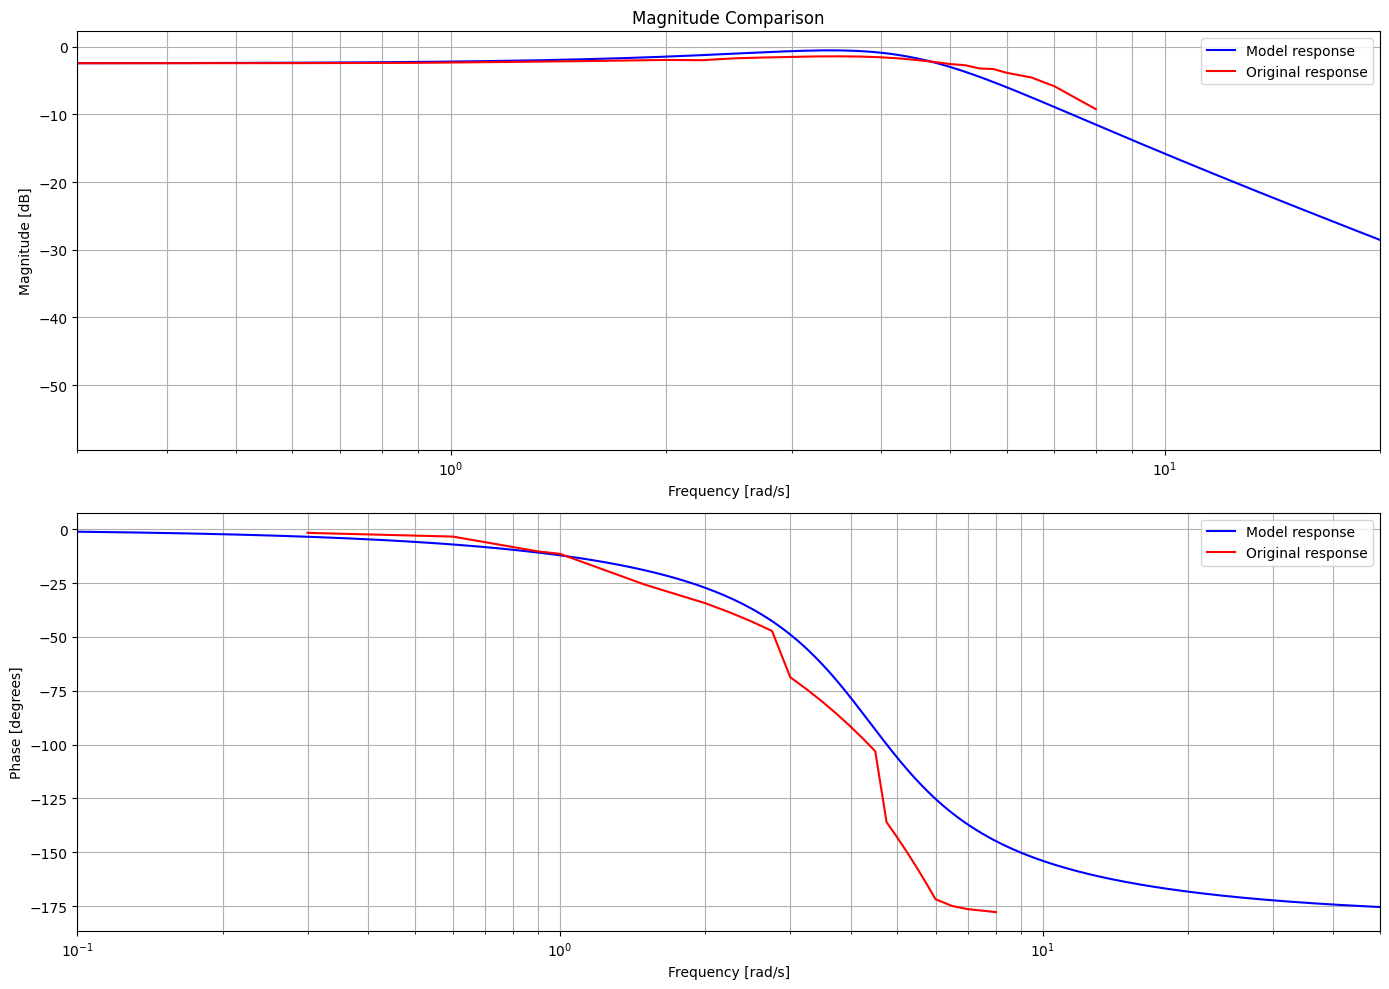

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Provided data
frequency = np.array([0.3, 0.6, 0.9, 1, 1.5, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5, 5.25, 5.5, 5.75, 6, 6.5, 7, 8, ])
gain_dB = np.array([-2.441060967, -2.42956409, -2.383728154, -2.338132828, -2.141420353, -1.954501591, -1.992657427, -1.713136858, -1.592315156, -1.509245644, -1.437205862, -1.421846195, -1.457727761, -1.561070915, -1.734321965, -1.970833572, -2.247653993, -2.562705958, -2.733542798, -3.216726342, -3.298877966, -3.849299439, -4.546232906, -5.840085072, -9.218478024])
phase_degrees = np.array([-1.718650541, -3.437301082, -10.31190325, -11.45767027, -25.77975812, -34.37301082, -38.66963717, -42.96626353, -47.26288988, -68.74602164, -74.47485678, -80.20369192, -85.93252705, -91.66136219, -97.39019733, -103.1190325, -136.0598345, -143.2208784, -150.3819223, -157.5429663, -164.7040102, -171.8650541, -175.0159134, -176.4481222, -177.8230426])

# Parameters for transfer function
omega_n = 4.393
zeta = 0.4481
K = 0.753

# Transfer function components
numerator1 = [K * omega_n**2]
denominator1 = [1, 2 * zeta * omega_n, omega_n**2]

# Create transfer function
sys1 = signal.TransferFunction(numerator1, denominator1)

# Frequency range for Bode plot
omega = np.logspace(-1, 2, 500)

# Compute the Bode plot for sys1
w1, mag1, phase1 = signal.bode(sys1, omega)

# Plot the Bode plot and collected data
plt.figure(figsize=(14, 10))

# Bode magnitude plot
plt.subplot(2, 1, 1)
plt.semilogx(w1, mag1, label='Model response', color='b')
plt.plot(frequency, gain_dB, '-', label='Original response', color='r')
plt.xlim([0.3, 20])
plt.title('Magnitude Comparison')
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Magnitude [dB]')
plt.grid(which='both', axis='both')
plt.legend()

# Bode phase plot
plt.subplot(2, 1, 2)
plt.semilogx(w1, phase1, label='Model response', color='b')
plt.plot(frequency, phase_degrees, '-', label='Original response', color='r')
plt.xlim([0.1, 50])
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Phase [degrees]')
plt.grid(which='both', axis='both')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

